In [2]:
import sys
import scipy.io as sio
import h5py
import numpy as np
from os.path import join as oj
import matplotlib.pyplot as plt
# %matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
import pandas as pd
import torch
sys.path.insert(1, oj(sys.path[0], '..'))  # insert parent path
from tqdm import tqdm
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn import decomposition
import matplotlib.gridspec as grd
from sklearn import neural_network
from torch.nn import functional as F
from torch import nn, optim


%load_ext autoreload
%autoreload 2

In [3]:
from stringer_dset import StringerDset
num_gpu = 1 if torch.cuda.is_available() else 0
device = 'cuda' # 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
# get data
sdset = StringerDset()


# get gan
gan_dir = '/accounts/projects/vision/chandan/gan/cifar100_dcgan_grayscale'
sys.path.insert(1, gan_dir)

# load the models
from dcgan import *

D = Discriminator_rect(ngpu=num_gpu).to(device)
G = Generator_rect(ngpu=num_gpu).to(device)

# load weights
D.load_state_dict(torch.load(oj(gan_dir, 'weights_rect/netD_epoch_299.pth')))
G.load_state_dict(torch.load(oj(gan_dir, 'weights_rect/netG_epoch_299.pth')))

# fit latent space

In [5]:
(ims, resps) = sdset[:2000]
# model = LinNet().to(device) 
ims = torch.Tensor(ims).to(device)
resps = torch.Tensor(resps).to(device)


  0%|          | 0/100 [00:00<?, ?it/s]

initializing...
training...


loss 17238.910159477124
grad tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')


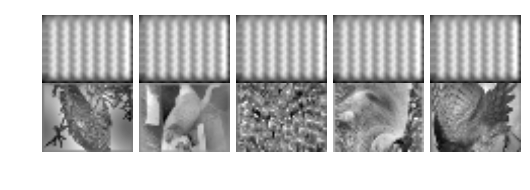


  2%|▏         | 2/100 [00:04<03:55,  2.40s/it]

loss 17238.910159477124
grad tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')



  3%|▎         | 3/100 [00:06<03:32,  2.19s/it]

loss 17238.911498039215
grad tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')


  4%|▍         | 4/100 [00:07<03:17,  2.05s/it]

loss 17238.910159477124
grad tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')


  5%|▌         | 5/100 [00:09<03:05,  1.95s/it]

loss 17238.910159477124
grad tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')


  6%|▌         | 6/100 [00:11<02:57,  1.89s/it]

loss 17238.910159477124
grad tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')


  7%|▋         | 7/100 [00:13<02:51,  1.84s/it]

loss 17238.911498039215
grad tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')


  8%|▊         | 8/100 [00:14<02:45,  1.80s/it]

loss 17238.911498039215
grad tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')


  9%|▉         | 9/100 [00:16<02:41,  1.78s/it]

loss 17238.911498039215
grad tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')


 10%|█         | 10/100 [00:18<02:38,  1.76s/it]

loss 17238.911498039215
grad tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')
loss 17238.912836601306
grad tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')


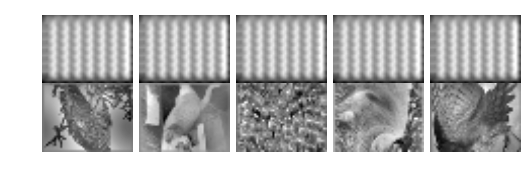

 12%|█▏        | 12/100 [00:22<02:48,  1.91s/it]

loss 17238.911498039215
grad tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')


 13%|█▎        | 13/100 [00:24<02:41,  1.86s/it]

loss 17238.911498039215
grad tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')


 14%|█▍        | 14/100 [00:25<02:36,  1.82s/it]

loss 17238.910159477124
grad tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')


 15%|█▌        | 15/100 [00:27<02:32,  1.79s/it]

loss 17238.911498039215
grad tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')


 16%|█▌        | 16/100 [00:29<02:28,  1.77s/it]

loss 17238.911498039215
grad tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')


 17%|█▋        | 17/100 [00:31<02:25,  1.76s/it]

loss 17238.911498039215
grad tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')


KeyboardInterrupt: 

In [13]:
class GenNet(nn.Module):
    def __init__(self, G):
        super(GenNet, self).__init__()
        self.fc1 = nn.Linear(11449, 100) # num_neurons to latent space
        self.fc1.weight.data = 0 * self.fc1.weight.data
        self.fc1.bias.data = 0 * self.fc1.bias.data
        self.G = G.eval()

    def forward(self, x):
        x = self.fc1(x)
#         print('latent', x[0, :20])
        x = x.reshape(x.shape[0], x.shape[1], 1, 1)
        im = self.G(x)
        return im
    
class LinNet(nn.Module):
    def __init__(self):
        super(LinNet, self).__init__()
        self.fc1 = nn.Linear(11449, 34 * 45) # num_neurons to latent space

    def forward(self, x):
        x = self.fc1(x)
        x = x.reshape(x.shape[0], 34, 45)
        return x

    
def viz_ims(ims_pred, ims):    
    plt.figure(figsize=(5, 2), dpi=100)
    R, C = 2, 5
    for i in range(5):
        plt.subplot(R, C, i + 1)
        plt.imshow(ims_pred[i].cpu().detach().numpy().reshape(34, 45), interpolation='bilinear', cmap='gray')
        plt.axis('off')
        plt.tight_layout()
        plt.subplots_adjust(hspace=0, wspace=0, left=0)
    for i in range(5):
        plt.subplot(R, C, i + 6)
        plt.imshow(ims[i].cpu().detach().numpy().reshape(34, 45), interpolation='bilinear', cmap='gray')
        plt.axis('off')
        plt.tight_layout()
        plt.subplots_adjust(hspace=0, wspace=0, left=0)
    plt.show()
    
print('initializing...')
model = GenNet(G).to(device)
its = 100
loss_fn = torch.nn.MSELoss(reduction='sum')
learning_rate = 1e0
optimizer = torch.optim.SGD(model.fc1.parameters(), 
                            lr=learning_rate)

print('training...')        
for it in tqdm(range(its)):
    ims_pred = model(resps)
    loss = loss_fn(ims_pred, ims)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('loss', loss.detach().item() / (34 * 45 * 2000))
    print('grad', model.fc1.weight.grad[0, :20])
#     print('pred', ims_pred[0, :20])
    if it % 10 == 0:
        viz_ims(ims_pred, ims)

# generate random ims

torch.Size([25, 100, 1, 1])
(25, 1, 34, 45)


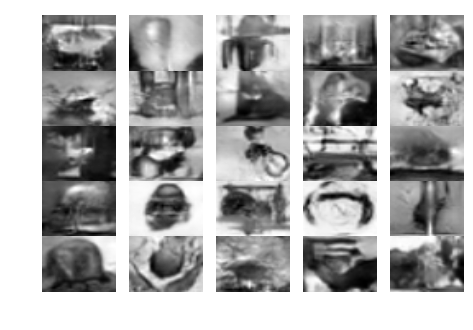

In [14]:
def generate_random_ims():
    batch_size = 25
    latent_size = 100

    fixed_noise = torch.randn(batch_size, latent_size, 1, 1).to(device)
    print(fixed_noise.shape)
    fake_images = G(fixed_noise)

    fake_images_np = fake_images.cpu().detach().numpy()
    print(fake_images_np.shape)
    fake_images_np = fake_images_np.reshape(fake_images_np.shape[0], 34, 45)
    # fake_images_np = fake_images_np.transpose((0, 2, 3, 1))
    plt.figure(figsize=(4.5, 3.4), dpi=100)
    R, C = 5, 5
    for i in range(batch_size):
        plt.subplot(R, C, i + 1)
        plt.imshow(fake_images_np[i], interpolation='bilinear', cmap='gray')
        plt.axis('off')
        plt.tight_layout()
        plt.subplots_adjust(hspace=0, wspace=0, left=0)
    plt.show()
generate_random_ims()